In [ ]:
# Execute this cell only if you are running this notebook on colab or a similar environment.
!pip install -r https://raw.githubusercontent.com/epigani/Synergy-Summer-School-2025/main/requirements.txt

!git clone https://github.com/epigani/Synergy-Summer-School-2025.git
%cd Synergy-Summer-School-2025/code

In [ ]:
from voter_model import voter_model, logseries_distribution

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_palette("colorblind")
sns.set_context("talk")
sns.set_style("ticks")

default_figdir = "../figures/VoterModel"
os.makedirs(default_figdir, exist_ok=True)

%load_ext autoreload
%autoreload 2

Let's start by defining the voter_model function. You can inspect it from the `voter_model.py` file.

This function simulates a population of J individuals, each with belonging to one of S possible species.

At each time step, one individual dies and it is immediately replaced by another one chosen uniformly at random from the population (with probability proportional to $1-\nu$) or by a new individual from the species pool (with probability $\nu$).


In [2]:
# Set simulation parameters. 

S = 100      # Number of possible opinions (e.g., species)
J = 5000      # Number of individuals in the population
T = 200      # Number of generations to simulate
nu = 0.001   # Speciation probability (chance of introducing a new opinion)

# Optionally, we could set a random initial condition:
# Each individual starts with a random opinion between 0 and S-1.
# But for now, we let the function generate it randomly if we don't specify IC.

# Run the simulation
opinion_counts_store, richness, time, time_c = voter_model(S=S, J=J, T=T, nu=nu)

## Speciation rate $\nu=0$

What do you expect to happen if the speciation rate is zero?

In [9]:
# run the simulation setting nu to 0.0. plot the vector of richness over time

In [2]:
S = 400      # Number of possible opinions (e.g., species)
J = 5000      # Number of individuals in the population
T = 200      # Number of generations to simulate
nu = 0.00   # Speciation probability (chance of introducing a new opinion)

# Run the simulation
opinion_counts_store, richness, time, time_c = voter_model(S=S, J=J, T=T, nu=nu)

In [3]:
# Let's inspect the output: the richness (number of distinct opinions) over time.
print("Time points (generations):", time)
print("Observed richness over time:", richness)

# For the opinion counts (abundances), let's print a subset
print("\nFirst few columns of opinion counts over time:")
print(opinion_counts_store[:, -5:])

Time points (generations): [  0.       1.       1.055    1.113    1.1742   1.2388   1.3068   1.3786
   1.4544   1.5344   1.6188   1.7078   1.8016   1.9006   2.0052   2.1154
   2.2318   2.3544   2.4838   2.6204   2.7644   2.9164   3.0768   3.246
   3.4244   3.6126   3.8112   4.0208   4.2418   4.475    4.721    4.9806
   5.2544   5.5432   5.848    6.1696   6.5088   6.8666   7.244    7.6422
   8.0624   8.5056   8.9732   9.4666   9.987   10.5362  11.1154  11.7264
  12.371   13.0512  13.7688  14.5256  15.3242  16.1668  17.0556  17.9932
  18.9824  20.026   21.1268  22.2884  23.5136  24.8064  26.1702  27.6088
  29.1268  30.728   32.4174  34.1996  36.0796  38.0632  40.1558  42.3634
  44.6924  47.1494  49.7416  52.4762  55.361   58.4046  61.6156  65.0028
  68.5766  72.3466  76.324   80.52    84.9466  89.6168  94.5436  99.7412
 105.2246 111.0094 117.1124 123.5508 130.3432 137.509  145.0686 153.044
 161.4578 170.3342 179.6986 189.5778]
Observed richness over time: [400 398 398 398 398 398 398 398

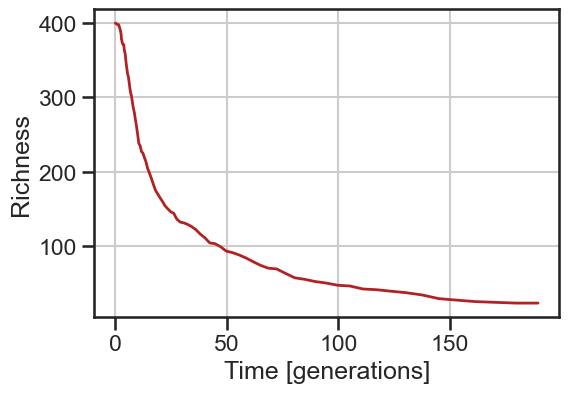

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(time, richness, lw=2, color='firebrick')
ax.set_xlabel('Time [generations]')
ax.set_ylabel('Richness')
ax.grid()

fig.savefig(f"{default_figdir}/richness_over_time.png", dpi=300, bbox_inches="tight")

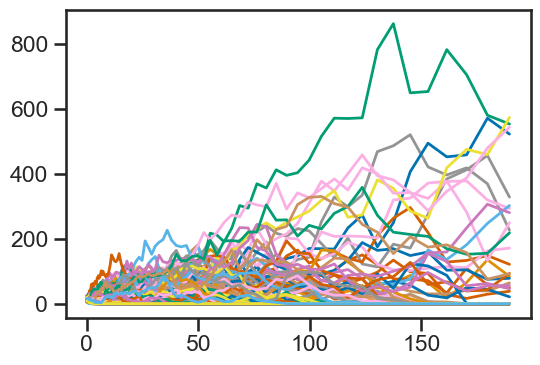

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
for i in range(0, S, 1):
    ax.plot(time, opinion_counts_store[i,:-1], lw=2, label=f'Opinion {i}')
    
ax.set_xlabel('Time [generations]')
ax.set_ylabel('Abundance')
ax.grid()

fig.savefig(f"{default_figdir}/abundance_over_time.png", dpi=300, bbox_inches="tight")

## Voter model with speciation

In [45]:
S = 500      # Number of possible opinions (e.g., species)
J = 5000      # Number of individuals in the population
T = 2000      # Number of generations to simulate
nu = 0.01   # Speciation probability (chance of introducing a new opinion)

# Run the simulation
opinion_counts_store, richness, time, time_c = voter_model(S=S, J=J, T=T, nu=nu)

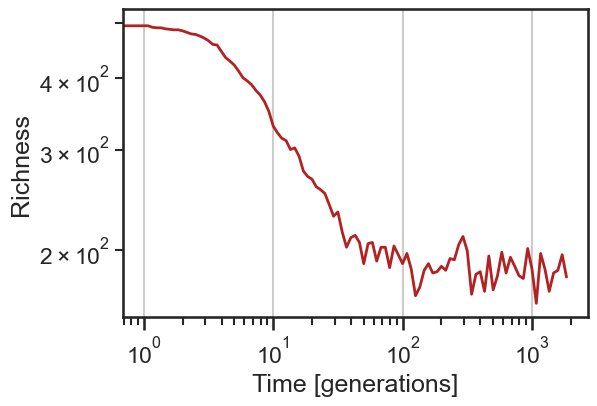

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(time, richness, lw=2, color='firebrick')
ax.set_xlabel('Time [generations]')
ax.set_ylabel('Richness')
ax.set_xscale('log')
ax.set_yscale('log')
ax.grid()

fig.savefig(f"{default_figdir}/richness_over_time_loglog.png", dpi=300, bbox_inches="tight")

# Change initial conditions

In [15]:
dist = logseries_distribution(theta=0.99, max_integer=1000)

S = 100                  # Number of possible species
IC = np.concatenate([[i] * count for i, count in enumerate(dist.rvs(size=S))]) # Initial condition: random distribution of opinions
J = len(IC)          # Total number of individuals in the population
T = 1000                # Number of generations to simulate 

print("Simulation parameters:")
print(f"S (species): {S}, J (individuals): {J}, T (generations): {T}")

Simulation parameters:
S (species): 100, J (individuals): 1683, T (generations): 1000


In [21]:
opinion_counts_store, richness, time, time_c = voter_model(S=S, J=J, T=T, nu=nu, IC=IC)

# for comparison, let's run the simulation with random IC

opinion_counts_store_r, richness_r, time_r, time_c_r = voter_model(S=S, J=J, T=T, nu=nu)

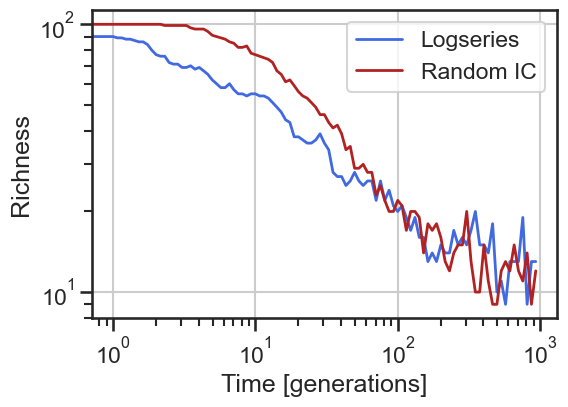

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(time, richness, lw=2, color='royalblue', label='Logseries')
ax.plot(time_r, richness_r, lw=2, color='firebrick', label='Random IC')
ax.set_xlabel('Time [generations]')
ax.set_ylabel('Richness')
ax.set_xscale('log')
ax.set_yscale('log')
ax.grid()

ax.legend()

fig.savefig(f"{default_figdir}/richness_over_time_loglog_logseries.png", dpi=300, bbox_inches="tight")

Other ideas to explore:
- Change the initial conditions, e.g. with another distribution
- Look at other patterns we discussed in the lecture, e.g. the species persistence time